# Load libraries

In [2]:
import pandas as pd
import numpy as np
import zipfile
import sqlite3

# unzip compressed data

In [3]:
# path_to_zip = './data/ml-25m.zip'
# with zipfile.ZipFile(path_to_zip,"r") as zip_ref:
#     zip_ref.extractall("./data")

In [4]:
data_sources = {
    # movielens
    'genome_scores'    : './data/ml-25m/genome-scores.csv',
    'genome_tags'      : './data/ml-25m/genome-tags.csv',
    'links'            : './data/ml-25m/links.csv',
    'movies'           : './data/ml-25m/movies.csv',
    'ratings'          : './data/ml-25m/ratings.csv',
    'tags'             : './data/ml-25m/tags.csv',
#     imdb
    'imdb_name_basics' : './data/name.basics.tsv.gz',
    'imdb_title_basics': './data/title.basics.tsv.gz',
    'imdb_ratings'     : './data/title.ratings.tsv.gz',
    'imdb_crew'        : './data/title.crew.tsv.gz',
    'imdb_principals'  : './data/title.principals.tsv.gz',
}

In [5]:
dfs = {}
for name, path in data_sources.items():
    print(dfs.keys(), end='\r')
    separator = '\t' if 'tsv' in path else ','
    dfs[name] = pd.read_csv(path, sep=separator)

/home/chris/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# crew is director/writer
# principal is cast (actors/resses)

In [20]:
dfs['imdb_title_basics'].head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,\N
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,\N
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,\N
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,\N
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,\N


In [21]:
dfs['imdb_crew'].head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [19]:
dfs['imdb_name_basics'][dfs['imdb_name_basics']['nconst']=='nm0005690']

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
5667,nm0005690,William K.L. Dickson,\N,\N,"cinematographer,director,producer","tt0219560,tt1428455,tt1496763,tt6687694"


In [12]:
dfs['imdb_crew']['writers'].head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


,int_id,str_id,str_id_7
0,100024,0 100024\n1 100029\n2 100...,0 100024\n1 100029\n2 100...
1,100029,0 100024\n1 100029\n2 100...,0 100024\n1 100029\n2 100...
2,100046,0 100024\n1 100029\n2 100...,0 100024\n1 100029\n2 100...
3,100049,0 100024\n1 100029\n2 100...,0 100024\n1 100029\n2 100...
4,100050,0 100024\n1 100029\n2 100...,0 100024\n1 100029\n2 100...


In [50]:
df_needed_movies['str_id'] = 'tt' + df_needed_movies['movie_id_int'].str.zfill(7)

In [51]:
df_needed_movies.head()

,movie_id_int,str_id
0,100024,tt0100024
1,100029,tt0100029
2,100046,tt0100046
3,100049,tt0100049
4,100050,tt0100050


In [103]:
needed_movies_joined_to_directors = pd.merge(df_needed_movies,
                                             dfs['imdb_crew'],
                                             left_on='str_id',
                                             right_on='tconst',
                                             how='left')
needed_movies_joined_to_directors.head()

,movie_id_int,str_id,tconst,directors,writers
0,100024,tt0100024,tt0100024,nm0005139,nm0005139
1,100029,tt0100029,tt0100029,nm0504802,"nm0913027,nm0000241,nm0504802"
2,100046,tt0100046,tt0100046,nm0669004,nm0179896
3,100049,tt0100049,tt0100049,nm0720000,nm0524108
4,100050,tt0100050,tt0100050,nm0002132,"nm0002132,nm0411477"


In [104]:
needed_movies_joined_to_directors.shape

(13795, 5)

In [105]:
needed_movies_joined_to_directors[needed_movies_joined_to_directors.directors == r'\N'].shape

(5, 5)

In [106]:
needed_movies_joined_to_directors = (
    needed_movies_joined_to_directors[needed_movies_joined_to_directors.directors != r'\N'])

In [107]:
needed_movies_joined_to_directors.shape

(13790, 5)

In [108]:
all_needed_directors = pd.Series(needed_movies_joined_to_directors.directors.unique())

In [109]:
cleaned_all_needed_directors = []
for pair in [person.split(',') for person in all_needed_directors]:
    for item in pair:
        cleaned_all_needed_directors.append(item)

In [110]:
cleaned_all_needed_directors = pd.DataFrame(np.array(cleaned_all_needed_directors), columns=['nconst'])
cleaned_all_needed_directors.head()

,nconst
0,nm0005139
1,nm0504802
2,nm0669004
3,nm0720000
4,nm0002132


In [86]:
# dfs['imdb_crew'][dfs['imdb_crew'].directors == r'\N']

In [111]:
directors_and_movies = pd.merge(cleaned_all_needed_directors, 
                                dfs['imdb_crew'],
                                left_on='nconst',
                                right_on='directors',
                                how='left')
directors_and_movies.head()

,nconst,tconst,directors,writers
0,nm0005139,tt0066842,nm0005139,nm0005139
1,nm0005139,tt0070153,nm0005139,nm0005139
2,nm0005139,tt0073531,nm0005139,nm0005139
3,nm0005139,tt0074759,nm0005139,nm0005139
4,nm0005139,tt0074988,nm0005139,nm0005139


In [112]:
dfs['imdb_crew'].head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [113]:
dfs['imdb_crew'][dfs['imdb_crew'].tconst == r'\N']

,tconst,directors,writers


In [115]:
directors_and_movies.head()

,nconst,tconst,directors,writers
0,nm0005139,tt0066842,nm0005139,nm0005139
1,nm0005139,tt0070153,nm0005139,nm0005139
2,nm0005139,tt0073531,nm0005139,nm0005139
3,nm0005139,tt0074759,nm0005139,nm0005139
4,nm0005139,tt0074988,nm0005139,nm0005139


In [130]:
directors_and_movies.head()

,nconst,tconst,directors,writers
0,nm0005139,tt0066842,nm0005139,nm0005139
1,nm0005139,tt0070153,nm0005139,nm0005139
2,nm0005139,tt0073531,nm0005139,nm0005139
3,nm0005139,tt0074759,nm0005139,nm0005139
4,nm0005139,tt0074988,nm0005139,nm0005139


In [129]:
4

4

In [131]:
s = directors_and_movies.groupby('nconst').count()['tconst'].sort_values(ascending=False)

In [132]:
import matplotlib.pyplot as plt

In [135]:
s.mean()

36.39319594373569

In [136]:
s.head()

nconst
nm0455741    1968
nm0005062    1617
nm0814716    1573
nm1853544    1089
nm0400958     924
Name: tconst, dtype: int64

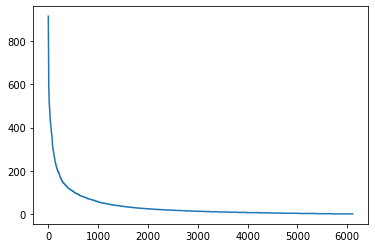

In [137]:
plt.plot(s.values[5:])
plt.show()

In [ ]:
directors_an

In [ ]:
# let off here, need to finish calculating the tag relevence weights for each director by  using all of the movies they are in

In [66]:
all_needed_directors

0                 nm0005139
1                 nm0504802
2                 nm0669004
3                 nm0720000
4                 nm0002132
               ...         
5740              nm0771228
5741              nm0540330
5742              nm0822582
5743              nm0663489
5744    nm0955443,nm0271835
Length: 5745, dtype: object

In [61]:
# needed_movies_joined_to_directors.groupby('directors').count().sort_values('movie_id_int', ascending=False)

In [54]:
needed_movies_joined_to_directors[needed_movies_joined_to_directors.directors.isna()]

,movie_id_int,str_id,tconst,directors,writers


In [37]:
df_needed_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13795 entries, 0 to 13794
Data columns (total 2 columns):
int_id    13795 non-null object
str_id    13795 non-null object
dtypes: object(2)
memory usage: 215.7+ KB


In [ ]:
# get all of the directors from all of the movies we have in our dataset
# for each director we need all of the movies that the director was in
# once we get this set of films we can calculate the tag relevence
# values for the director by some aggregation metric (mean




In [6]:
# EDA 
combined_df = pd.merge(dfs['genome_scores'], dfs['genome_tags'], on='tagId')
combined_df.tag.value_counts()

kung fu              13816
frightening          13816
not funny            13816
passionate           13816
christmas            13816
                     ...  
so bad it's funny    13816
romantic comedy      13816
cerebral             13816
space                13816
space program        13816
Name: tag, Length: 1128, dtype: int64

In [14]:
# EDA
combined_df[combined_df.relevance == 1].tag.unique()
all_ones = dfs['genome_scores'][dfs['genome_scores'].relevance==1.0]

In [15]:
all_ones

,movieId,tagId,relevance
10153,10,2,1.0
78551,71,720,1.0
192840,180,1081,1.0
240216,223,1081,1.0
377782,349,1031,1.0
...,...,...,...
14677434,163985,1027,1.0
14825362,168612,59,1.0
14828805,168712,118,1.0
15050802,176599,1027,1.0


In [17]:
dfs['movies'][dfs['movies'].movieId==10]

,movieId,title,genres
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [1]:
dfs['genome_tags'][dfs['genome_tags'].tagId == 688]

NameError: name 'dfs' is not defined

In [18]:
dfs['tags'][dfs['tags'].id ==2]

AttributeError: 'DataFrame' object has no attribute 'id'

In [11]:
# EDA
# for name in data_sources:
#     print(name)
#     print(dfs[name].shape)
#     print(dfs[name].head())
#     print()

In [12]:
# filter the movies we need from imdb based on movies present in tags dataset
merged_df = pd.merge(dfs['genome_scores'],
                     dfs['links'],
                     left_on='movieId',
                     right_on='movieId')
imdb_movies_to_keep = merged_df.imdbId.unique()

# properly format in order to join
imdb_ids_to_keep = 'tt' + pd.Series(imdb_movies_to_keep, dtype='str').str.zfill(7)

# filter imdb dataset
df =  dfs['imdb_title_basics']
dfs['imdb_title_basics_to_keep'] = df[df['tconst'].isin(imdb_ids_to_keep)]
dfs['imdb_title_basics_to_keep'].shape

(13795, 9)

In [13]:
table_cols = {
    'tags'         : ['id', 'name'],
    'movies'       : ['id', 'kind', 'primary_title', 'original_title',
                      'release_year', 'runtime_minutes', 'genres'],
    'tag_relevance': ['movie_id', 'tag_id', 'relevance'],
}

In [14]:
# dfs['imdb_title_basics_to_keep'].apply(lambda x: int(x['tconst'][2:]), axis=1)

In [15]:
# dfs['imdb_title_basics_to_keep']['tconst'].copy().str[2:].copy().astype(int)

In [17]:
# set dfs with proper column names
keep_cols = ['id', 'titleType', 'primaryTitle', 'originalTitle', 'startYear', 'runtimeMinutes', 'genres']
# dfs['imdb_title_basics_to_keep'].loc[:, 'id'] = dfs['imdb_title_basics_to_keep'].apply(lambda x: int(x['tconst'][2:]), axis=1)
dfs['imdb_title_basics_to_keep'].loc[:,'id'] = dfs['imdb_title_basics_to_keep']['tconst'].str[2:].astype(int)
dfs['imdb_title_basics_to_keep'] = dfs['imdb_title_basics_to_keep'][keep_cols]

# specify columns to keep
dfs['imdb_title_basics_to_keep'].columns = ['id', 'kind', 'primary_title', 'original_title',
                      'release_year', 'runtime_minutes', 'genres']
dfs['genome_tags'].columns = ['id', 'name']
dfs['genome_scores'].columns = ['movie_id', 'tag_id', 'relevance']

In [19]:
tags_table = """
CREATE TABLE IF NOT EXISTS tags (
    id integer PRIMARY KEY,
    name text NOT NULL
);
"""

# data from the title.basics.tsv.gz
# TODO: format genre as json or extract out into own table
movies_table = """
CREATE TABLE IF NOT EXISTS movies (
    id text PRIMARY KEY,
    kind text,
    primary_title text,
    original_title text,
    release_year integer,
    runtime_minutes integer,
    genres text
);
"""

# movie_id is the imdb movie db id (not the movie lens movie id)
# to access this movie in a url add 'tt' to the beginning of it
# https://www.imdb.com/title/tt<movie_id>
relevance_table = """
CREATE TABLE IF NOT EXISTS tag_relevance (
    fk_id integer,
    tag_id name text NOT NULL,
    relevance real NOT NULL
);
"""
TODO: run migration on this table ^

# movie_id is the imdb movie db id (not the movie lens movie id)
# to access this movie in a url add 'tt' to the beginning of it
# https://www.imdb.com/title/tt<movie_id>
relevance_table = """
CREATE TABLE IF NOT EXISTS actors (
    id integer,
    name text NOT NULL,
     NOT NULL,
     NOT NULL,
     NOT NULL,
     NOT NULL,
     NOT NULL,
     NOT NULL,
    
    
    
    );
"""

# movie_id is the imdb movie db id (not the movie lens movie id)
# to access this movie in a url add 'tt' to the beginning of it
# https://www.imdb.com/title/tt<movie_id>
relevance_table = """
CREATE TABLE IF NOT EXISTS director (
    id integer,
    name text NOT NULL,
     NOT NULL,
     NOT NULL,
     NOT NULL,
     NOT NULL,
     NOT NULL,
     NOT NULL,
    
    
    
    );
"""

# TODO: create table containing columns each representing a tagname
# and rows each representing a movie, values being the relavance value
# this will make querying easier for similarity metric

#TODO check out themovieddb.org and see if there is any dataset that may 
# have some information we would want, if so we can join to this dataset as well.


In [20]:
table_sql = {
    'tags'         : tags_table,
    'movies'       : movies_table,
    'tag_relevance': relevance_table
}

table_data_source = {
    'tags'         : 'genome_tags',
    'movies'       : 'imdb_title_basics_to_keep',
    'tag_relevance': 'genome_scores',
}

for table_name in table_sql:
    # create table
    c.execute(table_sql[table_name])
    # populate table with data
    df = dfs[table_data_source[table_name]]
    df.to_sql(table_name, conn, if_exists='append', index=False)

In [ ]:
db_name = './movie_sqlite.db'
conn = sqlite3.connect(db_name)
c = conn.cursor()

In [ ]:
conn.close()

In [ ]:
# sample sql to get all tag relevance scores for a movie
"""
    select m.primary_title, t.name, tr.relevance
    from movies m
    join tags t
    join tag_relevance tr
    on m.id = tr.movie_id
    and t.id = tr.tag_id
    where m.id = 12
    order by 3;
"""